In [6]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [7]:
ratings = pd.read_csv('../../Dataset/ml-25m/ratings.csv')
movies = pd.read_csv('../../Dataset/ml-25m/movies.csv')

In [8]:
#one hot encode
genres = movies['genres'].str.get_dummies('|')

genres.drop(columns=['(no genres listed)', 'Film-Noir', 'IMAX', 'Musical', 'Western', 'War'] ,axis=1, inplace=True)
genres
movies = pd.concat([movies, genres], axis=1)

In [19]:
pattern = '\((\d{4})\)'
movies['year'] = movies.title.str.extract(pattern, expand=False)


In [20]:
movies['year'] = pd.to_numeric(movies['year'])

C:\Users\arsla\AppData\Local\Temp\ipykernel_2912\3756289719.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax1.plot(movieId_groupby_year.year.first(), movieId_groupby_year.movieId.nunique(), "g-o", c='lightpink')


(0.0, 2638.6)

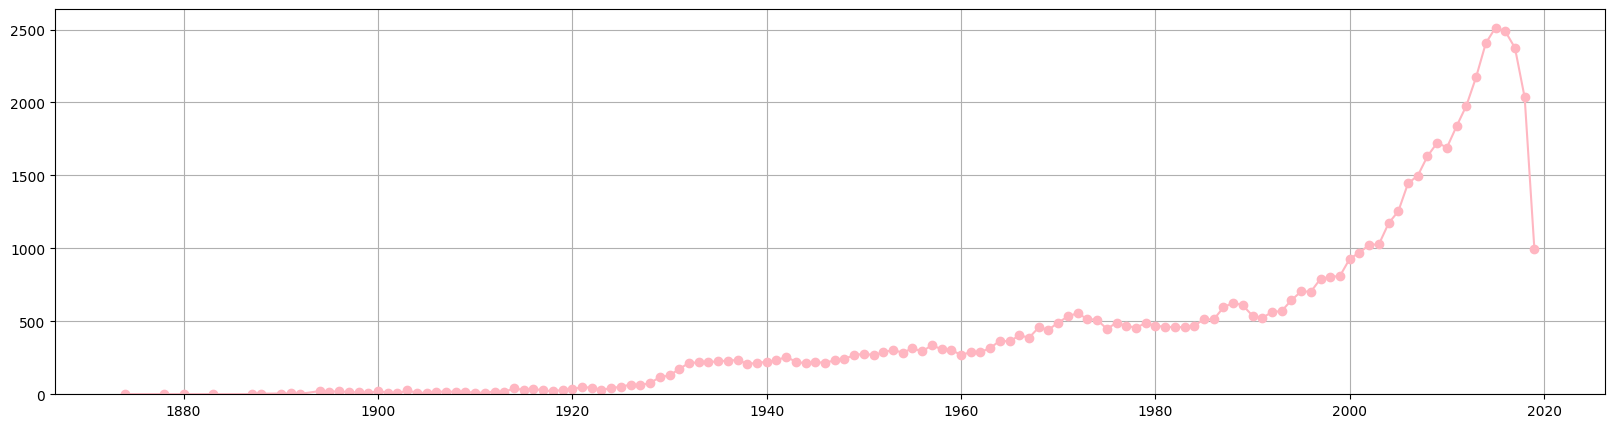

In [21]:
# neredeyse üstel olarak artmış
# her yıl çıkan  film sayısı genel olarak gittikçe artmış

# en çok film 2014'te çıkmış 
movieId_groupby_year = movies[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(movieId_groupby_year.year.first(), movieId_groupby_year.movieId.nunique(), "g-o", c='lightpink')
ax1.grid(None)
ax1.set_ylim(0,)

In [22]:
#türleri ayıralım
def splitDataFrameList(df,target_column,separator):

    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

df_movies_genres = splitDataFrameList(movies,"genres","|")

In [23]:
genres_counts = df_movies_genres['genres'].value_counts()
genres_counts

Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
Name: genres, dtype: int64

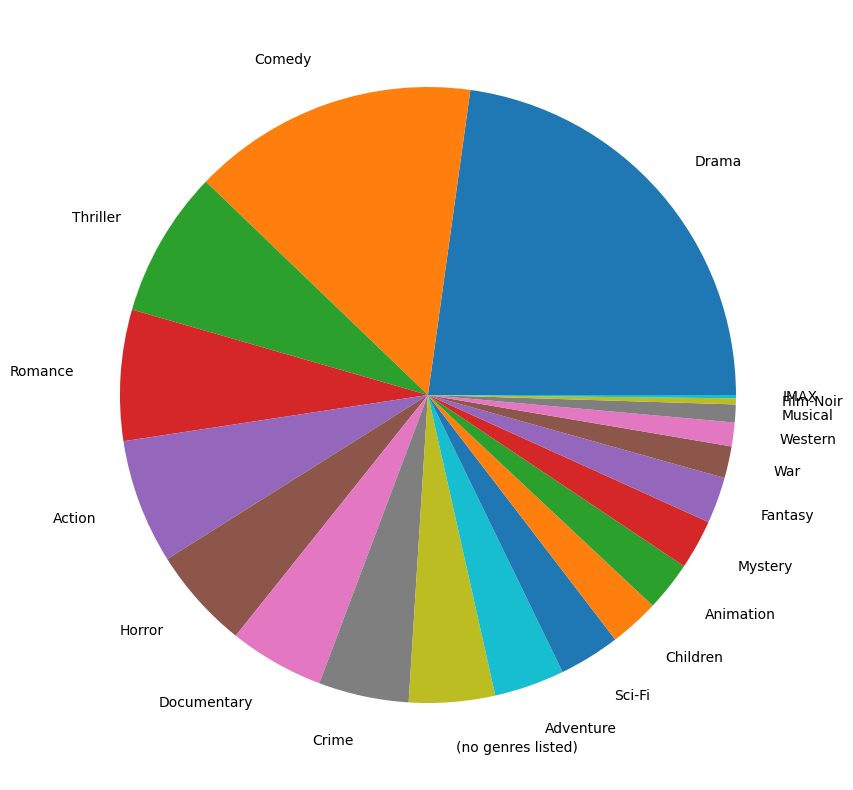

In [24]:
# en çok filme sahip olan tür dram
# açık ara en çok filme sahip olan 2 tür var. dram ve komedi
plt.figure(figsize=(10,10))
plt.pie(genres_counts, labels=genres_counts.index, labeldistance=1.15)
plt.show()

<AxesSubplot: title={'center': 'Distribution of Genres'}>

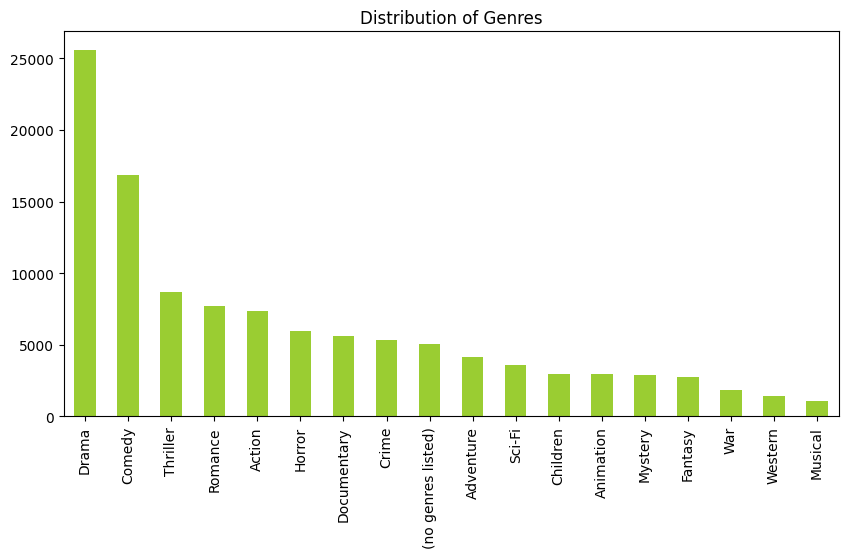

In [25]:
genres_counts[:18].plot(kind='bar', figsize=(10,5), color='yellowgreen',title="Distribution of Genres")

In [26]:
movies["age"] = 2023 - movies["year"]
movies.head()

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,year,age
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1995.0,28.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1995.0,28.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1995.0,28.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1995.0,28.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1995.0,28.0


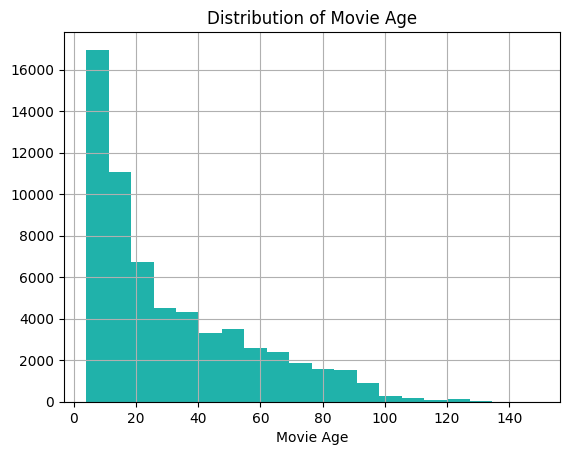

In [27]:
#çoğu filmin yaşı 0-20 arasında
movies["age"].hist(bins=20, color='lightseagreen')
plt.xlabel('Movie Age')
plt.title('Distribution of Movie Age')
plt.show()

In [28]:
#ortalama oy sayısını bulalım
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.rename(columns={'rating':'avg_rating'}, inplace=True)
ratings = ratings.merge(average_rating, on='movieId', how='inner')
ratings.head(5)

,userId,movieId,rating,timestamp,avg_rating
0,1,296,5.0,1147880044,4.188912
1,3,296,5.0,1439474476,4.188912
2,4,296,4.0,1573938898,4.188912
3,5,296,4.0,830786155,4.188912
4,7,296,4.0,835444730,4.188912


In [29]:
#oyun verildiği yılı bulalım
ratings_merge = ratings[['userId','movieId','rating']]
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.drop('timestamp', axis=1, inplace=True)
ratings['rating_year'] = pd.DatetimeIndex(ratings['parsed_time']).year
ratings.drop('parsed_time', axis=1, inplace=True)
ratings

,userId,movieId,rating,avg_rating,rating_year
0,1,296,5.0,4.188912,2006
1,3,296,5.0,4.188912,2015
2,4,296,4.0,4.188912,2019
3,5,296,4.0,4.188912,1996
4,7,296,4.0,4.188912,1996
...,...,...,...,...,...
25000090,162358,200192,2.0,2.000000,2019
25000091,162358,200194,2.0,2.000000,2019
25000092,162386,139970,3.5,3.500000,2019
25000093,162386,200726,4.0,4.000000,2019


In [30]:
#her filme kaç oy verildiğini bulalım. en çok oy verilen film 81491 oyla forrest gump, daha sonra ise 81482 oyla shawshank redemption
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.sort_values(by=['rating'], inplace=True, ascending=False)
movie_count = movie_count.merge(movies, on='movieId', how='inner')
movie_count[['movieId','title','rating']].head(5)

,movieId,title,rating
0,356,Forrest Gump (1994),81491
1,318,"Shawshank Redemption, The (1994)",81482
2,296,Pulp Fiction (1994),79672
3,593,"Silence of the Lambs, The (1991)",74127
4,2571,"Matrix, The (1999)",72674


In [31]:
#oy ortalaması:3.53
#Min oy: 0.5, Max oy: 5
ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

array([[<AxesSubplot: title={'center': 'rating'}>]], dtype=object)

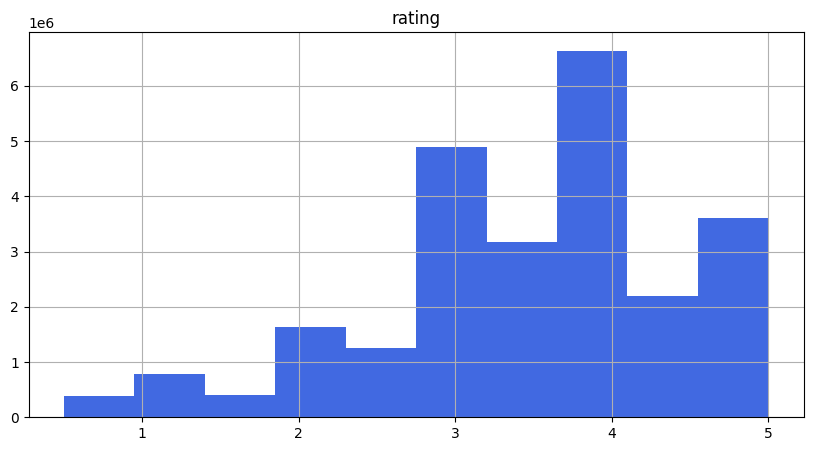

In [32]:
#oy dağılımı
#oylar 3 ve 4te yoğunlaşmış
#buçuklu oylar yerine tam oy vermek daha çok tercih edilmiş
#insanlaın daha çok yüksek oy verme eğiliminde olduğunu söyleyebiliriz
ratings.hist(column='rating', figsize=(10,5), color='royalblue')

In [33]:
#her kullanıcının kaç oy verdiğini bulalım
#en çok oy sayısına sahip olan kullanıcı 32202 oy vermiş

users_rating_count = ratings[['userId','rating']].groupby('userId').count()
users_rating_mean = ratings[['userId','rating']].groupby('userId').mean()
user_analysis = users_rating_count.merge(users_rating_mean, on='userId', how='inner')
user_analysis.rename(columns={'rating_x':'rating_count'}, inplace=True)
user_analysis.rename(columns={'rating_y':'avg_rating'}, inplace=True)
user_analysis.sort_values(by=['rating_count'], inplace=True, ascending=False)
user_analysis.head(5)

,rating_count,avg_rating
userId,,
72315,32202,3.080601
80974,9178,3.280290
137293,8913,3.184001
33844,7919,2.580124
20055,7488,3.208868


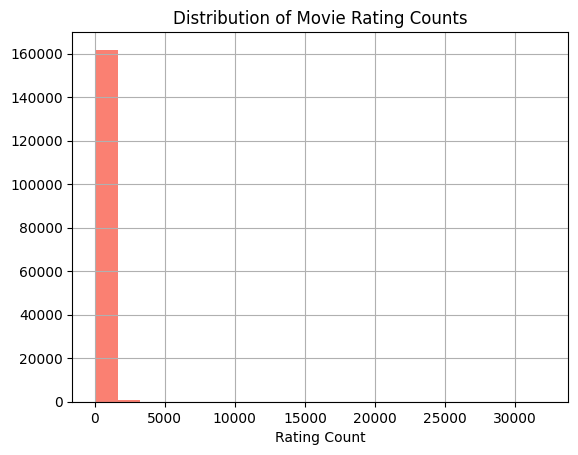

In [34]:
user_analysis['rating_count'].hist(bins=20, color='salmon')
plt.xlabel('Rating Count')
plt.title('Distribution of Movie Rating Counts')
plt.show()

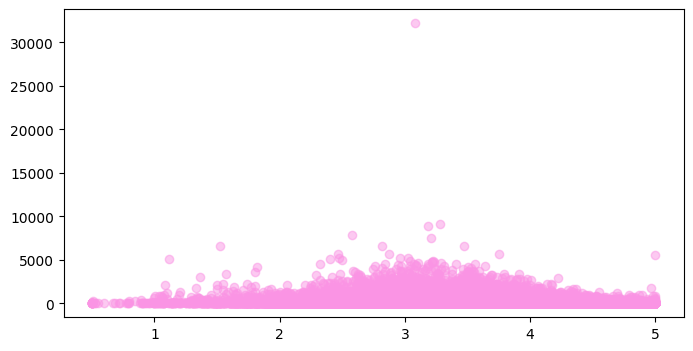

In [35]:
x = user_analysis['avg_rating']
y = user_analysis['rating_count']

plt.figure(figsize=(8, 4))
plt.scatter(x, y, c="#FA94E4", alpha=0.5, marker='o')
plt.show()

In [36]:
#her film kaç oy aldı

movie_rating_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_rating_mean = ratings[['movieId','rating']].groupby('movieId').mean()
movie_analysis = movie_rating_count.merge(movie_rating_mean, on='movieId', how='inner')
movie_analysis.rename(columns={'rating_x':'rating_count'}, inplace=True)
movie_analysis.rename(columns={'rating_y':'avg_rating'}, inplace=True)
movie_analysis.sort_values(by=['rating_count'], inplace=True, ascending=False)
movie_analysis.head(5)

,rating_count,avg_rating
movieId,,
356,81491,4.048011
318,81482,4.413576
296,79672,4.188912
593,74127,4.151342
2571,72674,4.154099


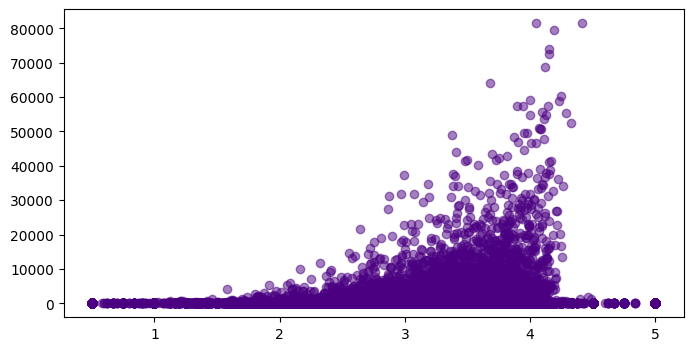

In [37]:
# insanların beğendikleri filme oy verme eğilimi daha yüksek
x = movie_analysis['avg_rating']
y = movie_analysis['rating_count']

plt.figure(figsize=(8, 4))
plt.scatter(x, y, c="indigo", alpha=0.5, marker='o')
plt.show()

In [38]:
#her oy kaç kere verildi
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


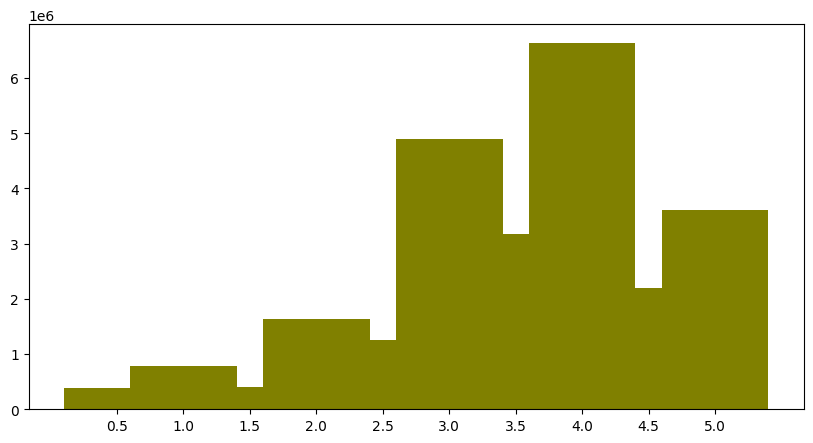

In [39]:
#insanların beğendikleri filme oy verme eğiliminin daha yüksek olduğunu burada da görebiliriz
plt.figure(figsize=(10,5))
plt.bar(ratings_count.index,ratings_count["movieId"], color='olive')
plt.xticks(ratings_count.index)
plt.show()